
    The Birthday Paradox demonstrates the probability that in a set of 'n' randomly chosen people,
    at least two of them have the same birthday. This simulation shows how probability evolves 
    with different group sizes, highlighting the interesting nature of probability theory.
    


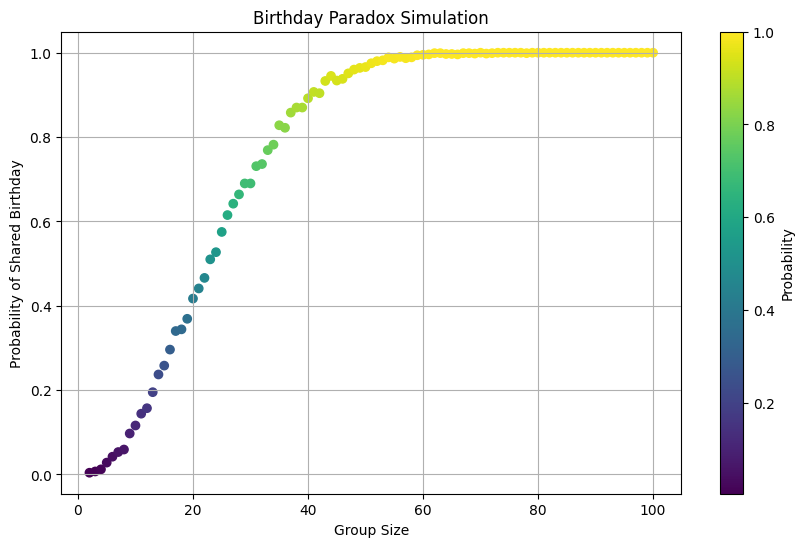

Mean Probability: 0.7717, Standard Deviation: 0.3271
Confidence Interval (95%): (np.float64(0.7072552615466763), np.float64(0.836138677847263))


In [37]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable
from multiprocessing import Pool

# Function to run a single simulation
def run_single_simulation(num_people, random_seed=None, specific_date=None):
    if random_seed:
        random.seed(random_seed)
    if specific_date:
        birthdays = [specific_date] * num_people
    else:
        birthdays = [random.randint(1, 365) for _ in range(num_people)]
    return len(birthdays) != len(set(birthdays))

# Function to run simulations for different group sizes
def run_simulations(group_sizes, num_trials, random_seed=None, specific_date=None):
    probabilities = []
    for size in group_sizes:
        with Pool() as pool:
            shared_count = pool.starmap(run_single_simulation, [(size, random_seed, specific_date)] * num_trials)
        probability = sum(shared_count) / num_trials
        probabilities.append(probability)
    return probabilities

# Function to calculate confidence interval
def calculate_confidence_interval(probabilities, confidence_level=0.95):
    mean = np.mean(probabilities)
    std_dev = np.std(probabilities)
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(len(probabilities)))
    return mean - margin_of_error, mean + margin_of_error

# Function to display educational content
def display_educational_content():
    content = """
    The Birthday Paradox demonstrates the probability that in a set of 'n' randomly chosen people,
    at least two of them have the same birthday. This simulation shows how probability evolves 
    with different group sizes, highlighting the interesting nature of probability theory.
    """
    print(content)

# Display the educational content
display_educational_content()

# Set up parameters
# Set up parameters
group_sizes = list(range(2, 101))  # Increase group size range
num_trials = 1000  # Increase number of trials

# Run simulations
probabilities = run_simulations(group_sizes, num_trials)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(group_sizes, probabilities, c=probabilities, cmap='viridis', marker='o')
plt.title('Birthday Paradox Simulation')
plt.xlabel('Group Size')
plt.ylabel('Probability of Shared Birthday')
plt.colorbar(label='Probability')
plt.grid(True)
plt.show()

# Display statistics
mean, std_dev = np.mean(probabilities), np.std(probabilities)
confidence_interval = calculate_confidence_interval(probabilities)
print(f"Mean Probability: {mean:.4f}, Standard Deviation: {std_dev:.4f}")
print(f"Confidence Interval (95%): {confidence_interval}")



/home/rahul/Projects/Ml_Micro/venv/lib64/python3.13/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


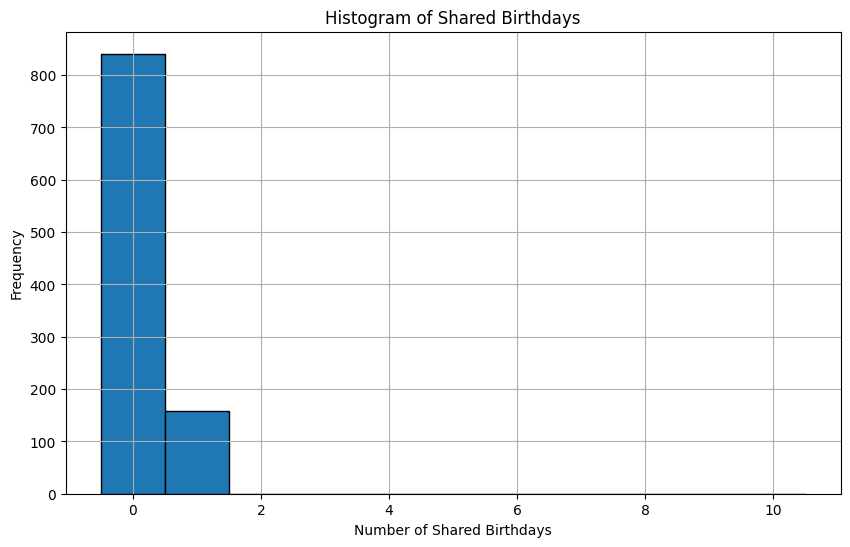

In [38]:
import random
import matplotlib.pyplot as plt
from multiprocessing import Pool

# Function to run a single simulation
def run_single_simulation(num_people, random_seed=None, specific_date=None):
    if random_seed:
        random.seed(random_seed)
    if specific_date:
        birthdays = [specific_date] * num_people
    else:
        birthdays = [random.randint(1, 365) for _ in range(num_people)]
    return len(birthdays) != len(set(birthdays))

# Function to run simulations for different group sizes
def run_simulations(group_sizes, num_trials, random_seed=None, specific_date=None):
    shared_birthday_counts = []
    for size in group_sizes:
        with Pool() as pool:
            shared_count = pool.starmap(run_single_simulation, [(size, random_seed, specific_date)] * num_trials)
        shared_birthday_counts.append(shared_count)
    return shared_birthday_counts

# Set up parameters
group_sizes = list(range(2, 101))
num_trials = 1000

# Run simulations
shared_birthday_counts = run_simulations(group_sizes, num_trials)

# Plot histogram of shared birthdays for a specific group size
plt.figure(figsize=(10, 6))
plt.hist(shared_birthday_counts[10], bins=range(12), edgecolor='black', align='left')
plt.title('Histogram of Shared Birthdays')
plt.xlabel('Number of Shared Birthdays')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import random
import numpy as np
from scipy.stats import norm  # Import for statistical calculations

# Function to simulate birthdays for a group and check for shared birthdays
def run_single_simulation(num_people):
    """
    Simulates birthdays for a given group size and checks if at least 
    two people share the same birthday.
    """
    birthdays = [random.randint(1, 365) for _ in range(num_people)]  # Random birthdays
    return len(birthdays) != len(set(birthdays))  # True if duplicates exist

# Function to perform multiple simulations and estimate probability
def run_simulations(group_size, num_trials):
    """
    Runs multiple simulations for a specific group size to estimate the 
    probability of at least two people sharing a birthday.
    """
    shared_count = 0  # Counter for simulations with shared birthdays
    for _ in range(num_trials):
        if run_single_simulation(group_size):
            shared_count += 1
    probability = 1- (shared_count / num_trials)  # Probability of shared birthdays
    return probability

# Function to calculate the confidence interval for the estimated probability
def calculate_confidence_interval(probability, num_trials, confidence_level=0.95):
    """
    Calculates the confidence interval for the estimated probability 
    using a normal approximation.
    """
    std_dev = np.sqrt((probability * (1 - probability)) / num_trials)  # Standard deviation
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z-score for the confidence level
    margin_of_error = z_score * std_dev  # Margin of error
    return probability - margin_of_error, probability + margin_of_error

# Main block for user interaction and displaying results
if __name__ == "__main__":
    # Take user inputs
    group_size = int(input("Enter the size of the group: "))
    num_trials = int(input("Enter the number of trials: "))

    # Run simulations
    probability = run_simulations(group_size, num_trials)

    # Display results
    print(f"\nProbability that at least two people in a group of {group_size} share the same birthday:")
    print(f"Estimated Probability: {probability:.6f}")

    # Calculate and display confidence interval
    confidence_interval = calculate_confidence_interval(probability, num_trials)
    print(f"Confidence Interval (95%): {confidence_interval}")



Probability that at least two people in a group of 20 share the same birthday:
Estimated Probability: 0.560976
Confidence Interval (95%): (np.float64(0.4535624533823037), np.float64(0.6683887661298915))


+------------+-------------+-------------------------+
| Group Size | Probability | 95% Confidence Interval |
+------------+-------------+-------------------------+
|     1      |   0.000000  |   (0.000000, 0.000000)  |
|     2      |   0.004000  |   (0.000088, 0.007912)  |
|     3      |   0.009000  |   (0.003147, 0.014853)  |
|     4      |   0.018000  |   (0.009760, 0.026240)  |
|     5      |   0.023000  |   (0.013709, 0.032291)  |
|     6      |   0.031000  |   (0.020258, 0.041742)  |
|     7      |   0.055000  |   (0.040870, 0.069130)  |
|     8      |   0.073000  |   (0.056877, 0.089123)  |
|     9      |   0.100000  |   (0.081406, 0.118594)  |
|     10     |   0.104000  |   (0.085080, 0.122920)  |
|     11     |   0.162000  |   (0.139164, 0.184836)  |
|     12     |   0.175000  |   (0.151450, 0.198550)  |
|     13     |   0.190000  |   (0.165685, 0.214315)  |
|     14     |   0.206000  |   (0.180934, 0.231066)  |
|     15     |   0.266000  |   (0.238613, 0.293387)  |
|     16  

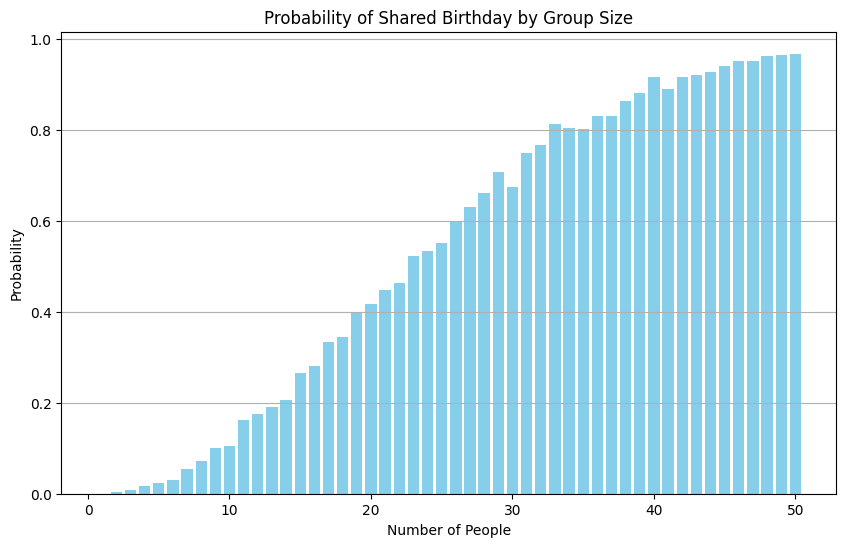

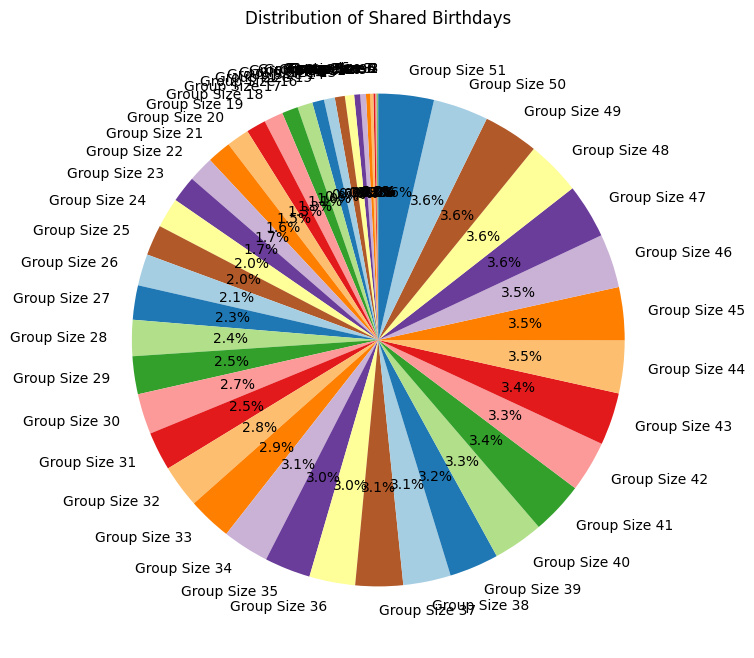

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from prettytable import PrettyTable

# Function to generate random birthdays
def generate_birthdays(num_people):
    return [random.randint(1, 365) for _ in range(num_people)]

# Function to check for shared birthdays
def has_shared_birthday(birthdays):
    return len(birthdays) != len(set(birthdays))

# Function to simulate one group
def run_single_simulation(num_people):
    birthdays = generate_birthdays(num_people)
    return has_shared_birthday(birthdays)

# Function to run simulations across group sizes
def run_simulations(group_size_range, num_trials):
    probabilities = []
    confidence_intervals = []
    for size in group_size_range:
        shared_count = [run_single_simulation(size) for _ in range(num_trials)]
        probability = np.mean(shared_count)
        probabilities.append(probability)

        # Calculate confidence interval
        std_dev = np.sqrt((probability * (1 - probability)) / num_trials)
        z_score = norm.ppf(0.975)  # 95% confidence interval
        margin_of_error = z_score * std_dev
        confidence_interval = (probability - margin_of_error, probability + margin_of_error)
        confidence_intervals.append(confidence_interval)
    return probabilities, confidence_intervals

# Function to display results in a table
def display_probabilities_table(group_size_range, probabilities, confidence_intervals):
    table = PrettyTable()
    table.field_names = ["Group Size", "Probability", "95% Confidence Interval"]
    for size, prob, ci in zip(group_size_range, probabilities, confidence_intervals):
        table.add_row([size, f"{prob:.6f}", f"({ci[0]:.6f}, {ci[1]:.6f})"])
    print(table)

# Function to plot probabilities as a bar graph
def plot_probabilities_bar(group_size_range, probabilities):
    plt.figure(figsize=(10, 6))
    plt.bar(group_size_range, probabilities, color='skyblue')
    plt.title('Probability of Shared Birthday by Group Size')
    plt.xlabel('Number of People')
    plt.ylabel('Probability')
    plt.grid(axis='y')
    plt.show()

# Function to plot probabilities as a pie chart
def plot_probabilities_pie(probabilities):
    labels = [f"Group Size {i}" for i in range(2, len(probabilities) + 2)]
    plt.figure(figsize=(8, 8))
    plt.pie(probabilities, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Shared Birthdays')
    plt.show()

# User-defined parameters
group_size_range = list(range(1, 51))  # Group sizes from 1 to 50
num_trials = 1000  # Number of trials for each group size

# Run simulations
probabilities, confidence_intervals = run_simulations(group_size_range, num_trials)

# Display results in a table
display_probabilities_table(group_size_range, probabilities, confidence_intervals)

# Plot probabilities as a bar graph
plot_probabilities_bar(group_size_range, probabilities)

# Plot probabilities as a pie chart
plot_probabilities_pie(probabilities)


In [103]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from prettytable import PrettyTable
import csv

# Function to generate random birthdays
def generate_birthdays(num_people):
    return [random.randint(1, 365) for _ in range(num_people)]

# Function to check for shared birthdays
def has_shared_birthday(birthdays):
    return len(birthdays) != len(set(birthdays))

# Function to simulate one group
def run_single_simulation(num_people):
    birthdays = generate_birthdays(num_people)
    return has_shared_birthday(birthdays)

# Function to run simulations across group sizes
def run_simulations(group_size_range, num_trials):
    probabilities = []
    confidence_intervals = []
    for size in group_size_range:
        shared_count = [run_single_simulation(size) for _ in range(num_trials)]
        probability = np.mean(shared_count)
        probabilities.append(probability)

        # Calculate confidence interval
        std_dev = np.sqrt((probability * (1 - probability)) / num_trials)
        z_score = norm.ppf(0.975)  # 95% confidence interval
        margin_of_error = z_score * std_dev
        confidence_interval = (probability - margin_of_error, probability + margin_of_error)
        confidence_intervals.append(confidence_interval)
    return probabilities, confidence_intervals

# Function to display results in a table
def display_probabilities_table(group_size_range, probabilities, confidence_intervals):
    table = PrettyTable()
    table.field_names = ["Group Size", "Probability", "95% Confidence Interval"]
    for size, prob, ci in zip(group_size_range, probabilities, confidence_intervals):
        table.add_row([size, f"{prob:.6f}", f"({ci[0]:.6f}, {ci[1]:.6f})"])
    print(table)

# Function to plot probabilities as a bar graph
def plot_probabilities_bar(group_size_range, probabilities):
    plt.figure(figsize=(10, 6))
    plt.bar(group_size_range, probabilities, color='skyblue')
    plt.title('Probability of Shared Birthday by Group Size')
    plt.xlabel('Number of People')
    plt.ylabel('Probability')
    plt.grid(axis='y')
    plt.show()

# Function to plot probabilities as a pie chart
def plot_probabilities_pie(probabilities):
    labels = [f"Group Size {i}" for i in range(2, len(probabilities) + 2)]
    plt.figure(figsize=(8, 8))
    plt.pie(probabilities, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Shared Birthdays')
    plt.show()


def save_to_csv(filename, group_size_range, probabilities, confidence_intervals):
    """
    Saves the probabilities and confidence intervals to a CSV file.
    """
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Group Size', 'Probability', 'Lower Bound', 'Upper Bound'])
        for size, prob, ci in zip(group_size_range, probabilities, confidence_intervals):
            writer.writerow([size, prob,f"{ci[0]:.6f}", f"{ci[1]:.6f}"])

# User-defined parameters
group_size_range = list(range(2, 51))  # Group sizes from 1 to 50
num_trials = 1000 # Number of trials for each group size

# Run simulations
probabilities, confidence_intervals = run_simulations(group_size_range, num_trials)

# display_probabilities_table(group_size_range, probabilities, confidence_intervals)

# # Plot probabilities as a bar graph
# plot_probabilities_bar(group_size_range, probabilities)

csv_filename = 'birthday_probabilities.csv' 
save_to_csv(csv_filename, group_size_range, probabilities, confidence_intervals)
print(f"Data saved to '{csv_filename}'.")


Data saved to 'birthday_probabilities.csv'.
